In [36]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd


In [35]:
FOLDER_PATH = Path("/Users/odedvaalany/Developer/ITA/statistics")
AGENT_NAME = "search"

In [37]:
def calculate_statistics(df):
    """
    Given a DataFrame, calculate the base statistics for the represented data.
    """
    return {
        "success_rate": df[df["Result"]==0]["Result"].size / df["Result"].size,
        "fail_rate": df[df["Result"]==1]["Result"].size / df["Result"].size,
        "unknown_rate": df[df["Result"]==2]["Result"].size / df["Result"].size,
        "average_time": df["Time"].mean(),
        "average_time_success": df[df["Result"]==0]["Time"].mean(),
        "average_time_fail": df[df["Result"]==1]["Time"].mean(),
        "average_time_unknown": df[df["Result"]==2]["Time"].mean(),
        "max_time": df["Time"][df["Result"]==0].max(),
        "min_time": df["Time"][df["Result"]==0].min(),
        "average_steps": df["Num of steps"].mean(),
        "average_steps_success": df[df["Result"]==0]["Num of steps"].mean(),
        "average_steps_fail": df[df["Result"]==1]["Num of steps"].mean(),
        "average_steps_unknown": df[df["Result"]==2]["Num of steps"].mean(),
        "max_steps": df["Num of steps"][df["Result"]==0].max(),
        "min_steps": df["Num of steps"][df["Result"]==0].min(),
    }

In [42]:
import matplotlib.pyplot as plt 
for file in (FOLDER_PATH / AGENT_NAME).iterdir():
    if file.is_file() and file.name.startswith("logs_"):
        df = pd.read_csv(file)
        statistics = calculate_statistics(df)
        print(f"\nStatistics for {file.name}:")
        [print(f"{key}: {value}") for key, value in statistics.items()]



Statistics for logs_SearchAgent_level_medium.txt:
success_rate: 0.415
fail_rate: 0.585
unknown_rate: 0.0
average_time: 0.7413878312110901
average_time_success: 1.1849670398666199
average_time_fail: 0.42671198233579977
average_time_unknown: nan
max_time: 3.0774829387664795
min_time: 0.4158868789672851
average_steps: 65.486
average_steps_success: 105.01204819277109
average_steps_fail: 37.44615384615385
average_steps_unknown: nan
max_steps: 155
min_steps: 34

Statistics for logs_SearchAgent_level_easy.txt:
success_rate: 0.653
fail_rate: 0.347
unknown_rate: 0.0
average_time: 0.03614590477943416
average_time_success: 0.047759845464919605
average_time_fail: 0.014290275766114288
average_time_unknown: nan
max_time: 0.1691718101501464
min_time: 0.0072431564331054
average_steps: 20.647
average_steps_success: 26.95865237366003
average_steps_fail: 8.769452449567723
average_steps_unknown: nan
max_steps: 50
min_steps: 10

Statistics for logs_SearchAgent_level_hard.txt:
success_rate: 0.158
fail_rate

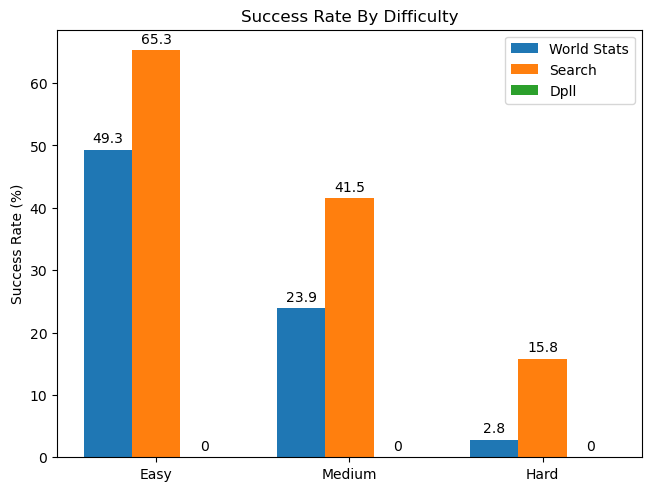

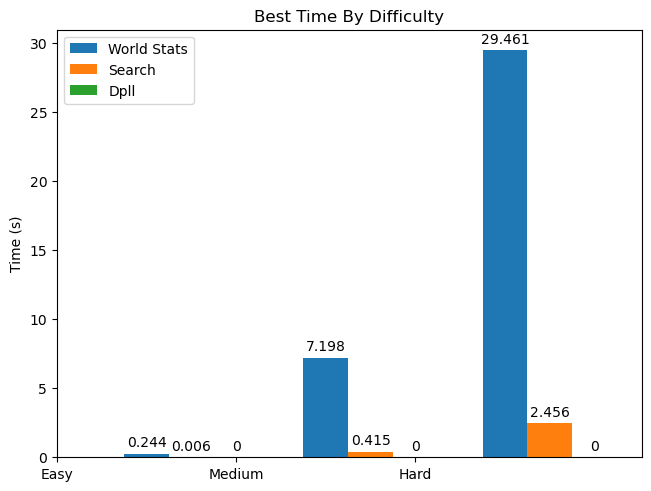

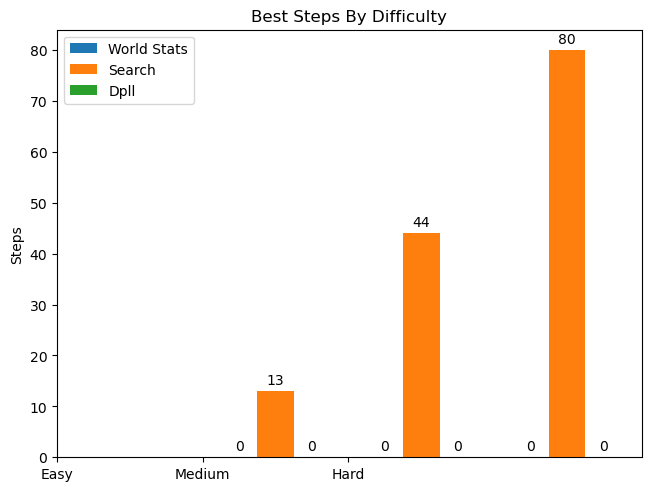

In [41]:
import matplotlib.pyplot as plt
import numpy as np
difficulties = ("Easy", "Medium", "Hard")
data = [{
    'World Stats': (49.3,23.9,2.8),
    'Search': (65.3, 41.5, 15.8),
    'Dpll': (0,0,0),
},
{
    'World Stats': (0.244,7.198,29.461),
    'Search': (0.006, 0.415, 2.456),
    'Dpll': (0,0,0),
},
{
    'World Stats': (0.0,0.0,0.0),
    'Search': (13, 44, 80),
    'Dpll': (0,0,0),
}]
titles = [
    "Success Rate By Difficulty",
    "Best Time By Difficulty",
    "Best Steps By Difficulty",
]
y_labels = [
    "Success Rate (%)",
    "Time (s)",
    "Steps",
]

x = np.arange(len(difficulties))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0
for title,y_label,data in zip(titles,y_labels,data):
    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in data.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_xticks(x + width, difficulties)
    ax.legend()

    plt.show()